In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import matplotlib.pyplot as plt
import geosnap as gio
from geosnap import DataStore
from geosnap.io import get_census, get_acs, get_nces, store_acs
import libpysal as ps
from libpysal.weights import Queen

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):


In [2]:
#tracts = gpd.read_file("github/15-minute-analysis/15-minute-package/data/tracts/cb_2022_us_tract_5m.shx")

In [3]:
#tracts

In [4]:
#sd_tracts = tracts.loc[(tracts['STATEFP'] == '06') & (tracts['COUNTYFP'] == '073')]

In [5]:
#sd_tracts

In [6]:
#sd_tracts.plot()

In [7]:
sd_boundary = gpd.read_file("github/15-minute-analysis/15-minute-package/data/sd_boundary/san_diego_boundary_datasd.shp")

<Axes: >

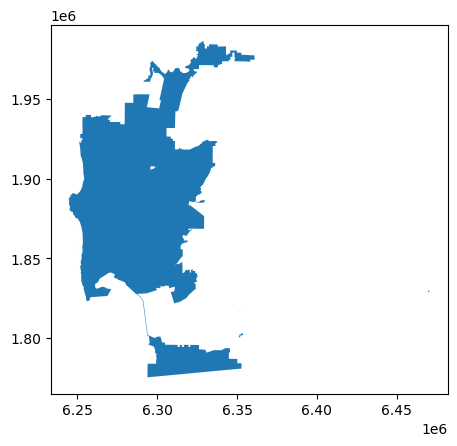

In [8]:
sd_boundary.plot()

In [9]:
datasets = DataStore("data/geosnap/")

In [10]:
demo = get_acs(datasets, county_fips='06073', years=[2020], level='tract')

/opt/tljh/user/lib/python3.10/site-packages/geosnap/_data.py:16: UserWarning: Streaming data from S3. Use `geosnap.io.store_acs()` to store the data locally for better performance
  warn(warning_msg)
/opt/tljh/user/lib/python3.10/site-packages/geosnap/io/util.py:275: UserWarning: Unable to find local adjustment year for 2020. Attempting from online data
  warn(
/opt/tljh/user/lib/python3.10/site-packages/geosnap/io/constructors.py:215: UserWarning: Currency columns unavailable at this resolution; not adjusting for inflation
  warn(


<Axes: >

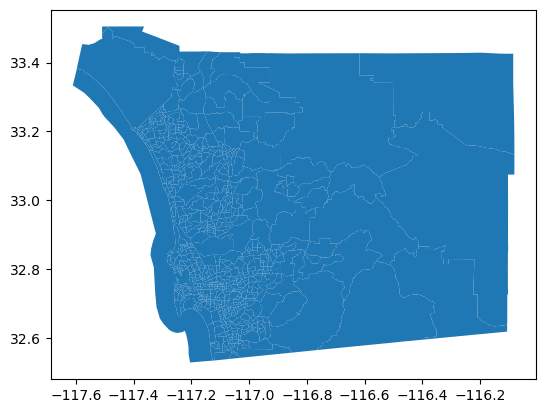

In [11]:
demo.plot()

In [12]:
demo = demo.to_crs(2230)

In [13]:
sd_demo = gpd.overlay(sd_boundary, demo)

In [14]:
sd_demo

,objectid,code,geoid,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,year,geometry
0,56,0,06073000100,255.0,0.0,42.0,37.0,123.0,43.0,35.0,...,2.289562,0.303030,0.000000,1.111111,0.000000,1.784512,0.000000,0.0,2020,"POLYGON ((6271212.508 1855074.386, 6271393.972..."
1,56,0,06073000201,54.0,11.0,0.0,9.0,68.0,39.0,121.0,...,9.281165,3.821656,0.000000,7.324841,0.000000,1.000910,0.000000,0.0,2020,"POLYGON ((6276375.410 1856718.155, 6276654.562..."
2,56,0,06073000202,365.0,0.0,36.0,62.0,146.0,150.0,19.0,...,2.927429,0.270603,0.000000,2.927429,0.000000,0.516605,0.000000,0.0,2020,"POLYGON ((6274535.866 1852524.707, 6274558.408..."
3,56,0,06073000301,473.0,0.0,41.0,0.0,43.0,131.0,69.0,...,15.101860,0.752879,1.992914,14.127547,0.000000,5.934455,0.000000,0.0,2020,"POLYGON ((6279287.227 1853533.698, 6279509.232..."
4,56,0,06073000302,450.0,0.0,0.0,7.0,52.0,135.0,86.0,...,10.290909,1.345455,0.000000,7.709091,2.581818,3.454545,0.000000,0.0,2020,"POLYGON ((6280617.190 1850738.841, 6280617.938..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,58,0,06073021101,1835.0,0.0,0.0,36.0,19.0,176.0,59.0,...,22.906452,2.941753,2.490684,7.373995,0.000000,18.493822,0.215729,0.0,2020,"POLYGON ((6470142.888 1828801.629, 6469603.214..."
388,59,0,06073013425,896.0,0.0,0.0,0.0,25.0,138.0,28.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2020,"POLYGON ((6351578.989 1816599.838, 6351540.000..."
389,59,0,06073021304,607.0,0.0,35.0,0.0,26.0,51.0,25.0,...,2.273425,1.290323,0.000000,2.242704,0.030722,0.706605,0.000000,0.0,2020,"POLYGON ((6351851.468 1816896.781, 6351908.999..."
390,60,0,06073013320,2775.0,23.0,0.0,0.0,74.0,33.0,0.0,...,7.732454,0.000000,1.483313,7.732454,0.000000,7.732454,0.000000,0.0,2020,"POLYGON ((6351742.153 1800646.805, 6351738.500..."


<Axes: >

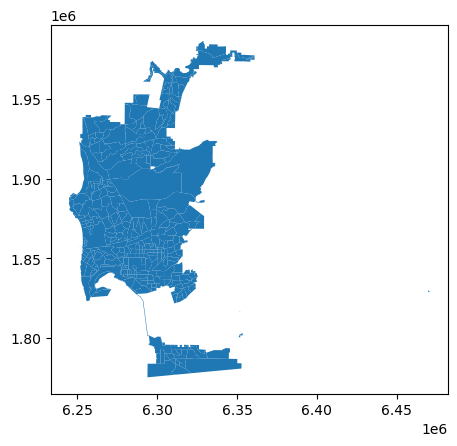

In [15]:
sd_demo.plot()

In [16]:
demo_queen = Queen.from_dataframe(sd_demo, use_index=False)

/opt/tljh/user/lib/python3.10/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 2 islands with ids: 326, 387.
  warnings.warn(message)


In [17]:
sd_demo['component'] = demo_queen.component_labels

In [18]:
sd_demo.component.value_counts()

component
0    386
3      2
4      2
1      1
2      1
Name: count, dtype: int64

In [19]:
sd_demo_WW = sd_demo

In [20]:
sd_demo_WW = sd_demo_WW.loc[sd_demo_WW['component'] == 0]

<Axes: >

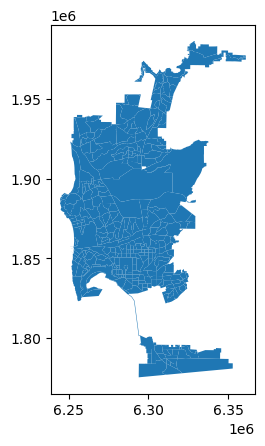

In [21]:
sd_demo_WW.plot()

<Axes: >

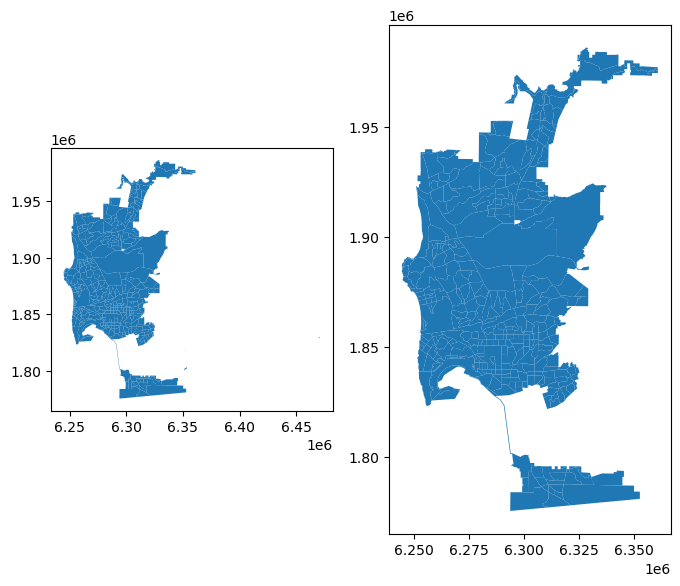

In [40]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(8,8))

sd_demo.plot(ax=ax[0])
sd_demo_WW.plot(ax=ax[1])

In [30]:
analysis_variables = ['n_total_pop', 'p_poverty_rate', 'median_household_income', 'per_capita_income', 
                      'p_nonhisp_white_persons', 'p_nonhisp_black_persons','p_hispanic_persons', 'p_asian_persons']

<Axes: >

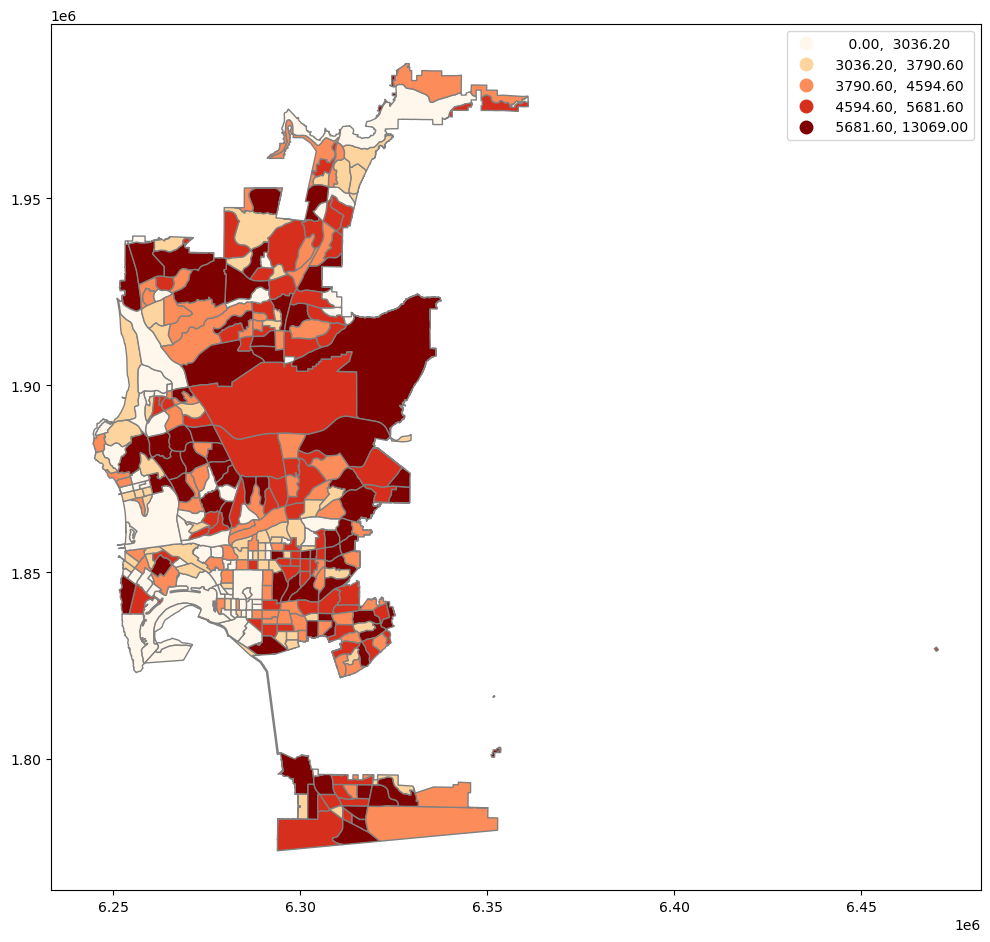

In [31]:
fig, ax = plt.subplots(figsize=(12, 12))

sd_demo.plot(column='n_total_pop', cmap='OrRd', scheme='quantiles', k=5, ax=ax, edgecolor='grey', legend=True)

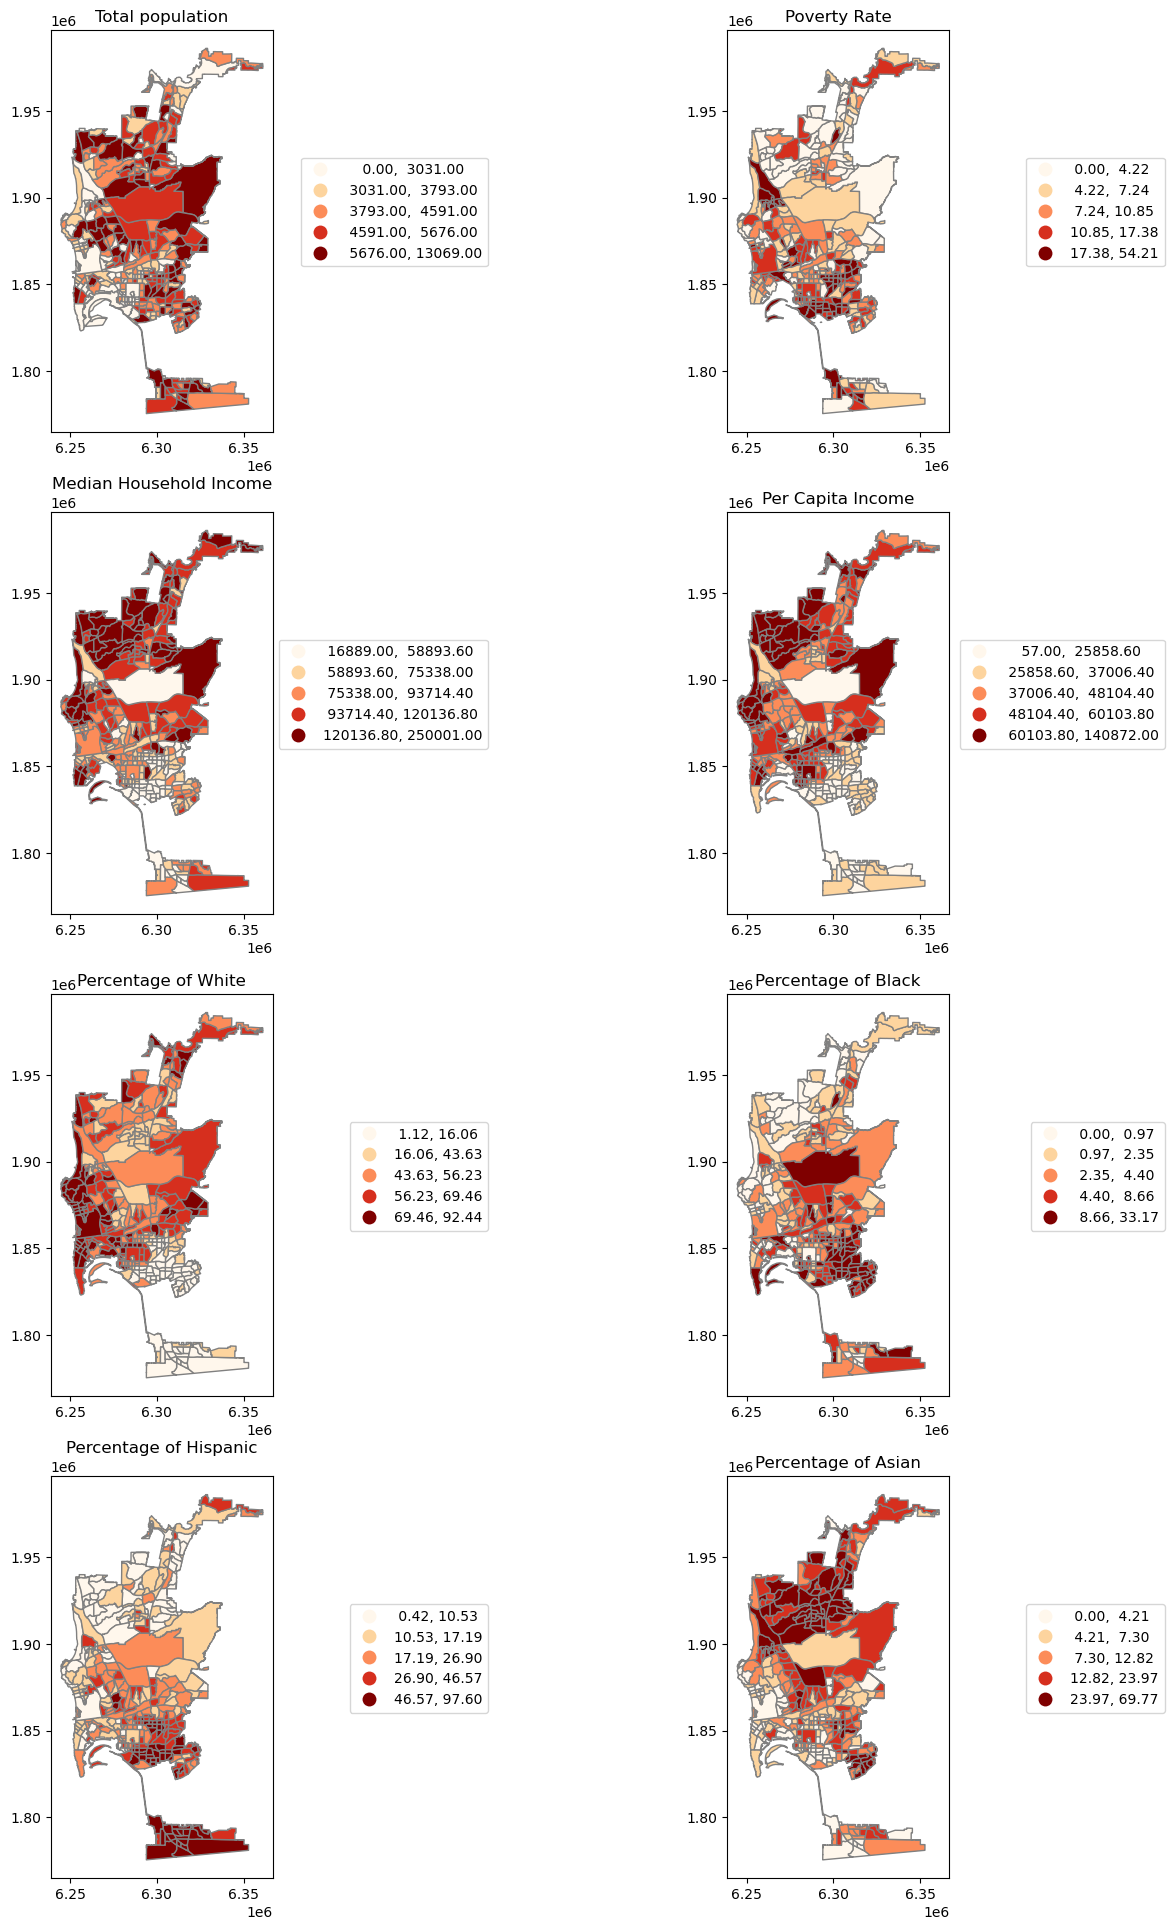

In [41]:
plot_titles = ['Total population', 'Poverty Rate', 'Median Household Income', 'Per Capita Income', 
                      'Percentage of White', 'Percentage of Black','Percentage of Hispanic', 'Percentage of Asian']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))
axs=axs.flatten()

for i, col in enumerate(analysis_variables):
    ax=axs[i]
    #sd_demo.plot(column='n_total_pop', cmap='OrRd', scheme='quantiles', k=5, ax=ax[0], edgecolor='grey', legend=True)
    sd_demo_WW.plot(column=col, cmap='OrRd', scheme='quantiles', k=5, ax=ax, edgecolor='grey', legend=True, legend_kwds={'bbox_to_anchor': (2, 0.7)})
    #ax.set_axis_off()
    ax.set_title(plot_titles[i])

plt.show()